In [49]:
import sys
import pandas as pd
import numpy as np

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval

from collections import OrderedDict

In [50]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#E69F00",
    "Stouffer":"#D44400",
    "REM":"#009E73",
    "RankProd":"#2E5EAA"
})

# Read results

In [51]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/"

dfs = {}

workdir = root_dir + "downsampled/results" 
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["downsampled"] = df

workdir = root_dir + "imbalanced/results"
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["imbalanced"] = df


print(dfs["imbalanced"].shape)
dfs["imbalanced"].head(4)

Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/downsampled/results with 2232 genes. Adj.p-values were not log-transformed.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/bacterial/imbalanced/results with 2234 genes. Adj.p-values were not log-transformed.


(2234, 12)


,pv_DEqMS,lfc_DEqMS,pv_FedProt,lfc_FedProt,lfc_Fisher,pv_Fisher,lfc_REM,pv_REM,pv_Stouffer,lfc_Stouffer,pv_RankProd,lfc_RankProd
A5A614,4.025783e-13,-0.865326,4.025783e-13,-0.865326,-0.846134,3.167219e-14,-0.810326,3.649685e-07,9.150104e-14,-0.846134,0.012258,-0.846134
O32583,5.498821e-11,-0.903078,5.498821e-11,-0.903078,-0.869539,1.522036e-08,-0.878016,4.167703e-08,1.371802e-08,-0.869539,0.012071,-0.869539
P00350,4.261704e-13,0.204803,4.261704e-13,0.204803,0.192000,1.847758e-15,0.209573,1.342475e-16,1.596576e-14,0.192000,0.220503,0.192000
P00363,4.596085e-02,-0.117860,4.596085e-02,-0.117860,-0.101493,2.115088e-01,-0.132020,2.128189e-02,7.685132e-01,-0.101493,0.615021,-0.101493


In [52]:
# log transform p-values in dfs, but first replace 0 with tiny value
log_dfs = {}
for k in dfs:
    df = dfs[k]
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    log_dfs[k] = df

# Deviations in the results of decentralized methods

First - for balanced.  
adj. p-val:
- min diff (supplementary)
- mean diff,
- max diff, 
- r, 
- rho

log2FC - same, for supplementary.
  




## stats tables

In [53]:
for dataset in log_dfs:
    pval_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.5, adj_pval_thr=0.05,
        stats=[ "MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    # save to file, dataset to lower case
    dataset = dataset.lower()
    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/log10pval_basic_stats.csv')


    lfc_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.5, adj_pval_thr=0.05,
        stats=["MeanDiff", "MaxDiff", "r", "ρ"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="lfc_",
        top_genes=-1
    )
    # save to file, dataset to lower case
    dataset = dataset.lower()
    lfc_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/log10lfc_basic_stats.csv')

    
    print(f'Dataset: {dataset}')
    print("\tP-value basic stats:")
    # print round values to 3 digits
    print(pval_basic_stats.round(3))     

Calculating corrs. Using p-vals - log-transformed.
Correlations computed for all genes from pv_ columns.
Correlations computed for all genes from lfc_ columns.
Calculating corrs. Using p-vals - log-transformed.
Correlations computed for all genes from pv_ columns.
Correlations computed for all genes from lfc_ columns.


Dataset: downsampled
	P-value basic stats:
          MeanDiff  MaxDiff      r      ρ
FedProt      0.000    0.000  1.000  1.000
Fisher       3.318   18.408  0.977  0.941
Stouffer     3.004   19.730  0.984  0.946
REM         14.003  275.644  0.761  0.913
RankProd    10.150   60.488  0.765  0.856
Dataset: imbalanced
	P-value basic stats:
          MeanDiff  MaxDiff      r      ρ
FedProt      0.000    0.000  1.000  1.000
Fisher       2.340   18.750  0.977  0.947
Stouffer     1.735   17.209  0.983  0.951
REM         13.902  264.850  0.770  0.913
RankProd    10.178   57.990  0.758  0.847


### correlation plots

Plotting corrs using p-vals - log-transformed.


downsampled           imbalanced          
                   r         ρ          r         ρ
FedProt     1.000000  1.000000   1.000000  1.000000
Fisher      0.976665  0.941376   0.976933  0.947478
Stouffer    0.983832  0.945642   0.983234  0.950824
REM         0.761231  0.913258   0.769644  0.913188
RankProd    0.765374  0.855987   0.758266  0.847122

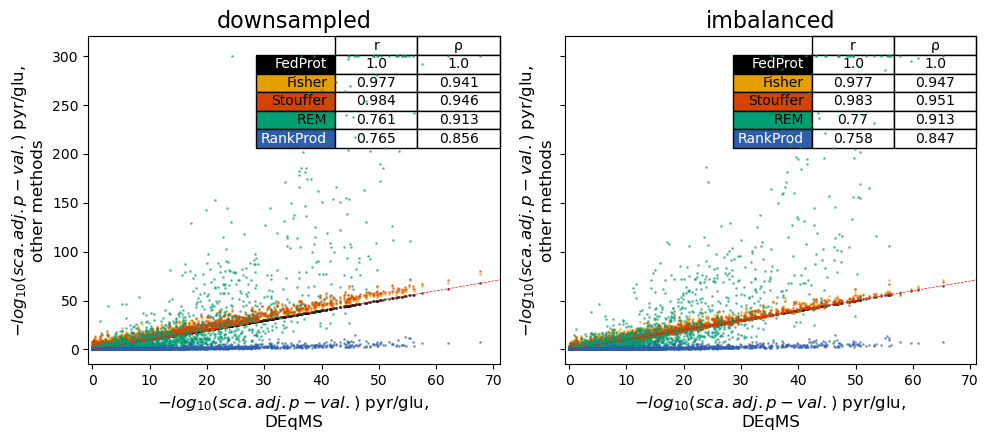

In [54]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=list(log_dfs.keys()),
    add_table=True
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

Plotting corrs using logFC values.


downsampled           imbalanced          
                   r         ρ          r         ρ
FedProt     1.000000  1.000000   1.000000  1.000000
Fisher      0.999875  0.999761   0.997784  0.996393
Stouffer    0.999875  0.999761   0.997784  0.996393
REM         0.998876  0.996817   0.997675  0.995352
RankProd    0.999875  0.999761   0.997784  0.996393

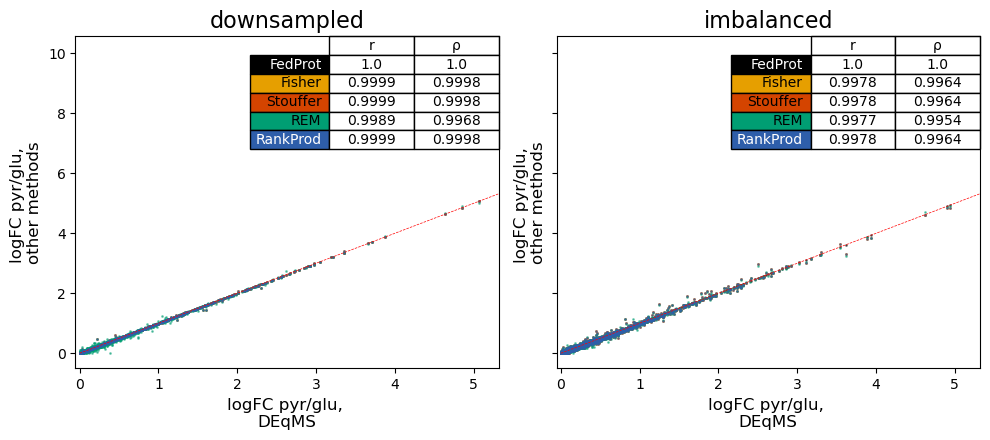

In [55]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=1,
    datasets=list(log_dfs.keys()),
    add_table=True
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

# The consistency of differentially expressed protein lists


In [56]:
# calculate FP, FN and F1

for dataset in dfs:
    pval_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.5, adj_pval_thr=0.05,
        stats=["FP", "FN", "Jaccard"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    print(f'Dataset: {dataset}')
    print("\tFP, FN and F1:")
    print(pval_basic_stats)

    dataset = dataset.lower()
    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/fp_fn_f1.csv')

Performance metrics calculated for all genes.
Performance metrics calculated for all genes.


Dataset: downsampled
	FP, FN and F1:
            FP    FN   Jaccard
FedProt    0.0   0.0  1.000000
Fisher     3.0   0.0  0.994983
Stouffer   3.0   0.0  0.994983
REM       11.0  26.0  0.938944
RankProd   2.0  75.0  0.871022
Dataset: imbalanced
	FP, FN and F1:
            FP    FN   Jaccard
FedProt    0.0   0.0  1.000000
Fisher    14.0  27.0  0.934400
Stouffer  14.0  27.0  0.934400
REM       13.0  30.0  0.931090
RankProd   6.0  91.0  0.842788


In [57]:
# Number of significant genes in DEqMS
for dataset in dfs:
    # get number of significant genes in DEqMS
    n_significant_DEqMS = dfs[dataset][(dfs[dataset]["pv_DEqMS"] < 0.05) & (dfs[dataset]["lfc_DEqMS"] > 0.25)].shape[0]
    print(f'Dataset: {dataset}')
    print(f'Number of significant genes in DEqMS: {n_significant_DEqMS}')

Dataset: downsampled
Number of significant genes in DEqMS: 462
Dataset: imbalanced
Number of significant genes in DEqMS: 482


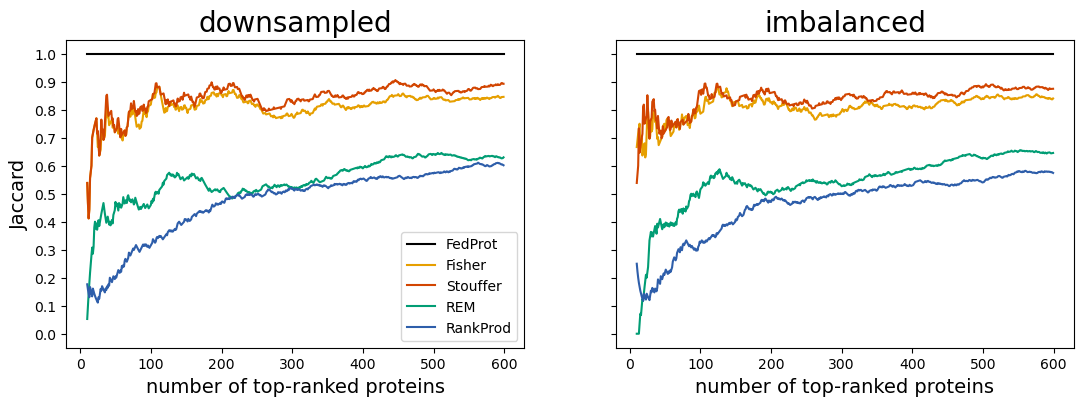

In [42]:
min_n_genes = 10
step = 1
max_n_genes = 600

data = fp_eval.plot_stats_for_topN(
    log_dfs,
    datasets = list(log_dfs.keys()),
    methods=["FedProt", "Fisher","Stouffer", "REM", "RankProd"],
    metrics=["Jaccard"],
    min_n_genes=min_n_genes,
    max_n_genes=max_n_genes,
    step=step,
    color_dict=color_dict,
    sharey=True
    )